# **Import Libraries**
___

In [1]:
# Analysis Libraries
import pandas as pd
import numpy as np

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#  Miscellaneous Libraries
import pickle 
import ast
from typing import Optional, Union
import re

# Machine Learning and Statistics Libraries 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mutual_info_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import xgboost as xgb
from sklearn.svm import SVR

# **Read Files** 
___
Read in the files that will be needed and set options for the visualization of dataframes.

In [2]:
# Read in modeling dataframe
df = pd.read_csv('Data\modeling_df.csv')

# Set dataframes to return all the features and not truncated.
pd.set_option('display.max_columns', None)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lenovo S145\AppData\Local\Temp\ipykernel_26596\124732219.py:2: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('Data\modeling_df.csv')


# **Dataset Identification**
___
Identify the shape and size of the dataset along with its axes and datatypes for each feature to understand the overall structure of the dataset that has been read in. 

In [3]:
# Return the shape and size of the dataset
print(f'Shape of Dataset: {df.shape}\nSize of Dataset: {df.size}')

Shape of Dataset: (5053, 18)
Size of Dataset: 90954


In [4]:
# Return the total number of null values and the total number of duplicates to confirm the cleaning process
dupes = df.duplicated().sum()
nulls = np.count_nonzero(df.isnull().values)
print(f'There are a total of {dupes} duplicate values, and {nulls} null values in the dataframe.')

There are a total of 628 duplicate values, and 0 null values in the dataframe.


In [5]:
# drop the duplicate values
df.drop_duplicates(ignore_index=True, inplace=True)

In [6]:
# Return the axes of the dataset
df.axes

[RangeIndex(start=0, stop=4425, step=1),
 Index(['price_(R)', 'Floor_size_(m²)', 'Bedrooms', 'Bathrooms', 'Lounges',
        'Property_type_Bachelor', 'Property_type_Cluster',
        'Property_type_Duplex', 'Property_type_Flat', 'Property_type_House',
        'Property_type_Loft', 'Property_type_Penthouse',
        'Property_type_Simplex', 'Property_type_Small Holding',
        'Property_type_Studio', 'Property_type_Townhouse',
        'suburb_Modderfontein', 'suburb_Rosebank and Parktown'],
       dtype='object')]

In [7]:
# Return the datatypes of each feature
df.dtypes

price_(R)                       float64
Floor_size_(m²)                 float64
Bedrooms                        float64
Bathrooms                       float64
Lounges                         float64
Property_type_Bachelor            int64
Property_type_Cluster             int64
Property_type_Duplex              int64
Property_type_Flat                int64
Property_type_House               int64
Property_type_Loft                int64
Property_type_Penthouse           int64
Property_type_Simplex             int64
Property_type_Small Holding       int64
Property_type_Studio              int64
Property_type_Townhouse           int64
suburb_Modderfontein              int64
suburb_Rosebank and Parktown      int64
dtype: object

In [8]:
# Return the top 5 rows of the dataframe
df.head()

,price_(R),Floor_size_(m²),Bedrooms,Bathrooms,Lounges,Property_type_Bachelor,Property_type_Cluster,Property_type_Duplex,Property_type_Flat,Property_type_House,Property_type_Loft,Property_type_Penthouse,Property_type_Simplex,Property_type_Small Holding,Property_type_Studio,Property_type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
0,-0.268264,-0.399989,0.0,-1.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.418202,0.087802,0.0,-1.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0.724693,0.614540,1.0,0.709511,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,-0.723314,-0.429638,0.0,0.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.051897,-1.175050,-1.0,-1.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
# Return the bottom 5 rows of the dataset
df.tail()

,price_(R),Floor_size_(m²),Bedrooms,Bathrooms,Lounges,Property_type_Bachelor,Property_type_Cluster,Property_type_Duplex,Property_type_Flat,Property_type_House,Property_type_Loft,Property_type_Penthouse,Property_type_Simplex,Property_type_Small Holding,Property_type_Studio,Property_type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
4420,-0.100130,-0.010204,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4421,-0.099356,-0.041399,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4422,-0.061478,-0.062699,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4423,0.010457,-0.385460,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4424,-0.393826,0.614540,-1.0,-1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0


# **Predictive Analysis**
___
Predictive analysis involves using statistical techniques and machine learning algorithms to analyze historical data and make informed predictions about future outcomes. Using the predictor features, we look to be able to predict the price of a property, given the information we have.

## 1. **Split Data**

During this process, we split the data into our dependent and independent variables. Dependent variables are the features required to train the model in order to make the predictions, which will be compared to the dependent variable to evaluate the performance of our machine learning algorithm.

In [10]:
# Store the dependent and the independent variables
X = df.drop(columns=['price_(R)'])
y = df['price_(R)']

# Split into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

## 2. **Correlation Analysis**
___

In this process, we look to find the correlation coefficient of the dependent features, to that of the dependent feature. This is in order to find the features that are most likely good predictors for the dependent feature. This is also done to view the relationship between independent variables. This is done to find potential multicollinearity, which is when features have a direct relationship (whether positive, or negative), which would affect the coefficients of each feature, as the premise of the relationship between a dependent variable and its independent variables, is based on the reasoning that *feature_a* for example, causes the dependent variable to move by one unit when it changes by it's coefficient value, given that all other features are kept constant. This cannot happpen if there is a direct relationship between different independent features because the increase in the one will result in the decrease in the other if the relationship can be defined as negative with a coefficient of -0.8 for example. 

### 2.1 **Correlation Heatmap**

Visualizing of the relationship between features using correlation matrix and seaborn heatmap. 

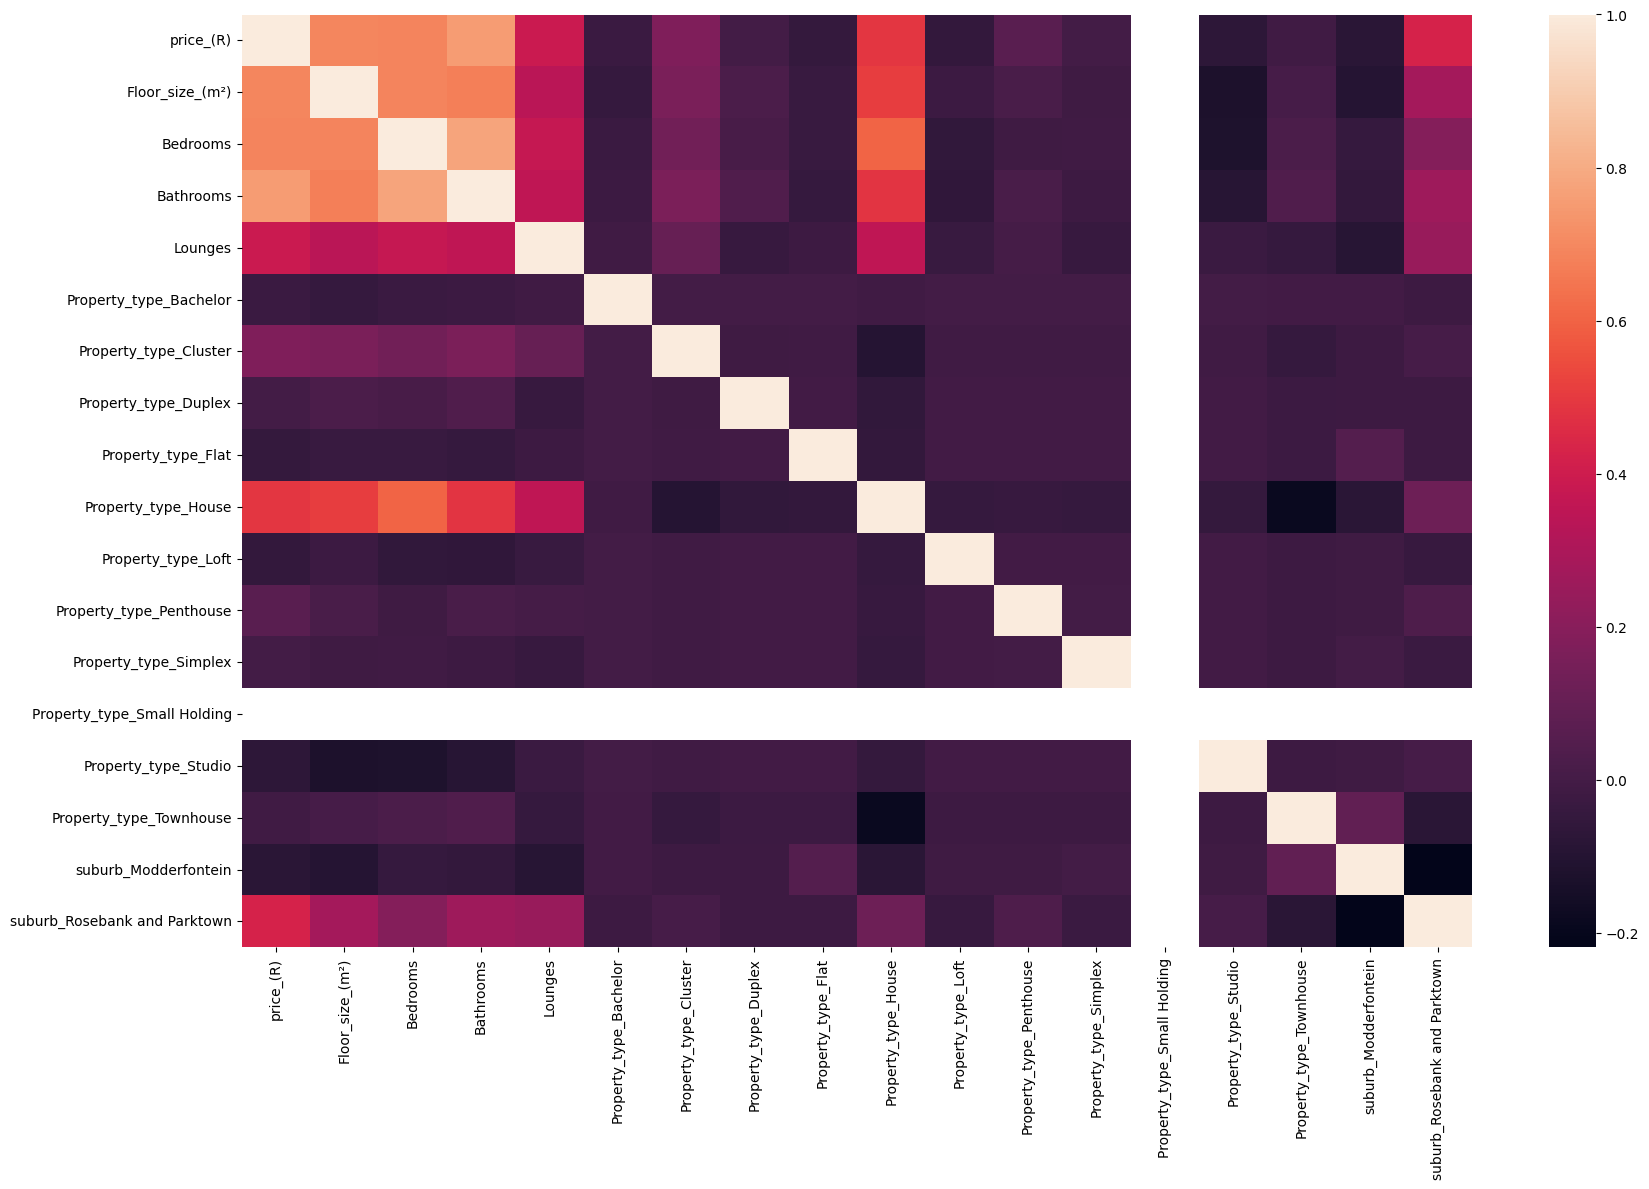

In [11]:
# Visualize the correlation matrix for the dataset
corr_matrix = df.corr()

plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix)
plt.tight_layout()
plt.show()

### 2.2 **Variance Inflation Factor**

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. The higher the VIF, the higher the possibility that multicollinearity exists, and further research is required. When VIF is higher than 10, there is significant multicollinearity that needs to be corrected. In general terms:
* VIF = 1: Variables are not correlated
* 1 <= VIF <= 5: Variables are moderately correlated
* VIF > 5: Variables are highly correlated

In [12]:
# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif = vif.sort_values(by='VIF', ascending=False)
vif

c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Variable,VIF
1,Bedrooms,3.674159
8,Property_type_House,2.392716
0,Floor_size_(m²),2.321447
2,Bathrooms,2.255346
3,Lounges,1.645434
16,suburb_Rosebank and Parktown,1.530049
5,Property_type_Cluster,1.106309
14,Property_type_Townhouse,1.094546
15,suburb_Modderfontein,1.062933
13,Property_type_Studio,1.028298


### 2.3 **Feature Importance**

Determine feature importance using the mutual info score of each column and the independent variable. This will identify the most important independent variable in determining the target variable.

In [13]:
# Store the columns of all the independent variables
features = X.columns

# Use dicitonary comprehension to apply the mutual info score function on each column, and store the column
# name as the key of and the integer value of the mutual info score function as the value. 
mi_data = {features[i]:mutual_info_score(X[column], y) for i, column in enumerate(X)}
mi_df = pd.DataFrame(mi_data, index=['MI Score']).T.sort_values(by='MI Score', ascending=False)
mi_df

c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discr

,MI Score
Floor_size_(m²),2.618891
Bathrooms,0.775986
Bedrooms,0.681530
Lounges,0.322557
Property_type_House,0.293536
suburb_Rosebank and Parktown,0.258187
Property_type_Townhouse,0.076511
suburb_Modderfontein,0.065685
Property_type_Cluster,0.052403
Property_type_Duplex,0.021661


## 3. **Model Selection**
___
Applying a machine learning algorithm to predict the outcomes based on the dependent features, and comparing the model performances

In [14]:
# Store a dictionary where the key is the model name and the value is the ml algorithm
model_dict = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42),
}

### 3.1 **Fitting Models on Training Data**

In [15]:
def modelFitting(
    model: Union[RandomForestRegressor, xgb.XGBRegressor],
    X: Optional[pd.DataFrame]=X_train, 
    y: Optional[pd.DataFrame]=y_train,
) ->np.ndarray:
    """
    Trains a model and makes predictions.

    Parameters:
        - model: A machine learning model (either LogisticRegression or RandomForestClassifier).
        - X_train: Training feature data.
        - y_train: Training labels.
        - X_test: Test feature data for prediction.

    Returns:
        - y_pred: Predicted labels for the test data, to be compared to known test data.
    """
    # Fit the model with training data
    model = model.fit(X, y)

    return model

def modelPredict(
    model: Union[RandomForestRegressor, xgb.XGBRegressor],
    independent_variables: Optional[pd.DataFrame]=X_train,
    y: Optional[np.ndarray]=y_train
    ):
    # Make predictions with the fitted model
    y_pred = model.predict(independent_variables)
    # Return the r2 score of the prediction
    pred_r2_score = r2_score(y, y_pred)

    return pred_r2_score

In [16]:
# Train the model using the training data. 
fitted_model_dict = {model_name: modelFitting(model) for model_name, model in model_dict.items()}

In [17]:
def modelEvaluation(model_dict: dict[str, Union[RandomForestRegressor, xgb.XGBRegressor]]):
    # R2 Score on the training set
    r2_scores_training = {
        f'{model_name}': {'R2 Score (Training Set)': modelPredict(model)}
        for model_name, model in model_dict.items()
    }

    # R2 Score on the test set
    r2_scores_test = {
        f'{model_name}': {'R2 Score (Test Set)': modelPredict(model, X_test, y_test)}
        for model_name, model in model_dict.items()
    }

    # Create a dataframe from the two scores from the training and test datasets.
    evaluation_table = pd.DataFrame.from_dict(r2_scores_training, orient='index')
    new_df = pd.DataFrame.from_dict(r2_scores_test, orient='index')

    # Append the new dataframe to the existing DataFrame
    evaluation_table = pd.concat([evaluation_table, new_df], axis=1)
    # Find the percentage difference between the test and training datasets
    evaluation_table['Score Difference'] = np.abs(
        evaluation_table['R2 Score (Test Set)'] / evaluation_table['R2 Score (Training Set)']
    ) * 100 - 100

    return evaluation_table

In [18]:
# Store the evaluation table for the standard models. 
evaluation_table = modelEvaluation(fitted_model_dict)
evaluation_table

,R2 Score (Training Set),R2 Score (Test Set),Score Difference
Random Forest Regressor,0.892585,0.748805,-16.108264
XGBoost Regressor,0.866048,0.768183,-11.300167


### 3.2 **Model Hypertuning**

In [19]:
def hyperParameterTune(model, params, X=X_train, y=y_train):
    # Instantiate gridsearch
    reg = GridSearchCV(model, params, scoring='r2', cv=5, verbose=1, n_jobs=-1, refit=True)

    # Fit the model
    best_reg = reg.fit(X, y)

    # Output the best parameters
    print(f"{best_reg.best_params_}\n")

    return best_reg


In [20]:
def crossValidation(
    model_name: str,
    model: Union[RandomForestRegressor, xgb.XGBRFRegressor],
    X: Optional[pd.DataFrame]=X_train, 
    y: Optional[np.ndarray]=y_train,
    ):
        # store cross-validated predictions
        cv_r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5, n_jobs=-1)

        # Evaluate model performance on the resampled training set
        print(f"R² scores before tuning (training set): {cv_r2_scores}")
        print(f"Mean R² score before tuning (training set): {cv_r2_scores.mean()}\n")

        return {model_name:{'R2 Score (Training Set)': cv_r2_scores.mean()}}


In [21]:
# Random Forest Regressor 
rfr_params = {
    'n_estimators': [100], 
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'max_depth': [7, 9, 11],
}

# XGBoost Regressor 
xgbr_params = {
    'n_estimators': [500, 800, 1000],
    'learning_rate': [0.01, 0.1],
    'max_depth': [20, 25, 30, None],
    'min_child_weight': [1, 3],
    'subsample': [0.4, 0.6, 0.8],
    'colsample_bytree': [1],
    'gamma': [0.2, 0.5, 1.0],
    'eta': [0.001, 0.01]
}

hyperparameters = [rfr_params, xgbr_params]

# Store a dictionary where the key is the model name and the value is the ml algorithm
hype_mod_dct = {
    'Random Forest Regressor (Tuned)': RandomForestRegressor(random_state=42),
    'XGBoost Regressor (Tuned)': xgb.XGBRegressor(random_state=42),
}

tuned_models_dict = {
    model_name: hyperParameterTune(model,hyperparameters[i]) 
    for i, (model_name, model) in enumerate(hype_mod_dct.items())
}

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'criterion': 'squared_error', 'max_depth': 9, 'n_estimators': 100}

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\Users\Lenovo S145\Desktop\Portfolio\Property\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'colsample_bytree': 1, 'eta': 0.001, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': 0.6}



### 3.3 **Cross Validation using Tuned Models**

In [22]:
tuned_evaluation_dict = {}
for model_name, model in tuned_models_dict.items():
    data = crossValidation(model_name, model)
    tuned_evaluation_dict.update(data)

tuned_evaluation_table = pd.DataFrame.from_dict(tuned_evaluation_dict, orient='index')
evaluation_table = pd.concat([evaluation_table, tuned_evaluation_table], axis=0)


R² scores before tuning (training set): [0.74249849 0.72102634 0.73427903 0.74208232 0.72904863]
Mean R² score before tuning (training set): 0.7337869628801548

R² scores before tuning (training set): [0.74800557 0.72491191 0.74416136 0.75249679 0.73266282]
Mean R² score before tuning (training set): 0.7404476892261384



In [23]:
evaluation_table

,R2 Score (Training Set),R2 Score (Test Set),Score Difference
Random Forest Regressor,0.892585,0.748805,-16.108264
XGBoost Regressor,0.866048,0.768183,-11.300167
Random Forest Regressor (Tuned),0.733787,NaN,NaN
XGBoost Regressor (Tuned),0.740448,NaN,NaN


### 3.4 **Tuned Model Performance on test data**

In [24]:
tuned_test_eval_dict = {}
for model_name, best_model in tuned_models_dict.items():
    y_pred_test = best_model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    data = {model_name: {'R2 Score (Test Set)': r2_test}}
    tuned_test_eval_dict.update(data)

tuned_test_eval_dict

{'Random Forest Regressor (Tuned)': {'R2 Score (Test Set)': 0.7656855397634751},
 'XGBoost Regressor (Tuned)': {'R2 Score (Test Set)': 0.776894960540518}}

In [25]:
# Reassign values in df
for key, item in tuned_test_eval_dict.items():
    evaluation_table.loc[key, 'R2 Score (Test Set)'] = item.get('R2 Score (Test Set)')

# Find the best fitting model
evaluation_table['Score Difference'] = np.abs(
    evaluation_table['R2 Score (Test Set)'] - evaluation_table['R2 Score (Training Set)']
) * 100
evaluation_table

,R2 Score (Training Set),R2 Score (Test Set),Score Difference
Random Forest Regressor,0.892585,0.748805,14.377998
XGBoost Regressor,0.866048,0.768183,9.786482
Random Forest Regressor (Tuned),0.733787,0.765686,3.189858
XGBoost Regressor (Tuned),0.740448,0.776895,3.644727


In [37]:
# Create the masking conditions
underfitting_mask = (evaluation_table['R2 Score (Test Set)'] < 0.7) & (evaluation_table['R2 Score (Training Set)'] < 0.7)
good_fit_mask = (evaluation_table['R2 Score (Test Set)'] >= 0.7) & (evaluation_table['R2 Score (Training Set)'] >= 0.7)

# Create new column with values determined by the conditions of the other features. 
evaluation_table['Model Fit'] = (
    np.where(
        (good_fit_mask) & (evaluation_table['Score Difference'] <= 5), 'Good Fit',
         np.where(
             (good_fit_mask) & (evaluation_table['Score Difference'] < 10), 'Okay Fit',
                  np.where(
                      (good_fit_mask) & (evaluation_table['Score Difference'] >= 10), 'Overfitting',
                      np.where(underfitting_mask, 'Underfitting', 'Unknown')
                    )
            )
    )
)

In [40]:
evaluation_table

,R2 Score (Training Set),R2 Score (Test Set),Score Difference,Model Fit
Random Forest Regressor,0.892585,0.748805,14.377998,Overfitting
XGBoost Regressor,0.866048,0.768183,9.786482,Okay Fit
Random Forest Regressor (Tuned),0.733787,0.765686,3.189858,Good Fit
XGBoost Regressor (Tuned),0.740448,0.776895,3.644727,Good Fit


In [44]:
# Filter the evaluation table by the records that are good fit in the model fit feature, and find the index
# of the record with the max value in the R2 Score (Test Set) feature
best_model = (
    evaluation_table[(evaluation_table['Model Fit'] == 'Good Fit')]['R2 Score (Test Set)']
    .idxmax()
)
# Add the tuned_models_dict to the fitted_model_dict
fitted_model_dict.update(tuned_models_dict)
# Store the best model using the model name as the key.
best_model = fitted_model_dict.get(best_model)

## **Save Model**
___

Save the best performing model for deployment. 

In [46]:
# Use context manager to write pickle file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
# Load the saved model from the pickle file
with open('trained_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [47]:
#  Make predictions with X_test
y_pred_pickle = loaded_model.predict(X_test)

# Use classification report to return key evaluation metrics
r2_score = r2_score(y_test, y_pred_pickle)
mse = mean_squared_error(y_test, y_pred_pickle)
print(r2_score, mse)

0.776894960540518 0.09557169651458879


In [48]:
loaded_model.feature_names_in_

array(['Floor_size_(m²)', 'Bedrooms', 'Bathrooms', 'Lounges',
       'Property_type_Bachelor', 'Property_type_Cluster',
       'Property_type_Duplex', 'Property_type_Flat',
       'Property_type_House', 'Property_type_Loft',
       'Property_type_Penthouse', 'Property_type_Simplex',
       'Property_type_Small Holding', 'Property_type_Studio',
       'Property_type_Townhouse', 'suburb_Modderfontein',
       'suburb_Rosebank and Parktown'], dtype='<U28')